In [102]:
import pandas as pd
import math
import numpy as np
from prophet import Prophet
from utility import utility
import yfinance as yf
import plotly.graph_objects as go
import plotly.express as px 
import streamlit as st
import random
import matplotlib.pyplot as plt

In [103]:
# df = yf.download("EURUSD=X", period="2y", interval="1h")
df = utility.collect_yf("EURUSD", '1y', '1h')
# df = yf.download("EURUSD=X", period="14d", interval="1h")

[*********************100%***********************]  1 of 1 completed


In [104]:
df.head()

,datetime,open,high,low,close,adj close
0,2022-06-16 14:00:00,1.039393,1.043841,1.039069,1.043188,1.043188
1,2022-06-16 15:00:00,1.043406,1.047230,1.043406,1.045478,1.045478
2,2022-06-16 16:00:00,1.045369,1.050200,1.043950,1.049759,1.049759
3,2022-06-16 17:00:00,1.049869,1.053075,1.049538,1.053075,1.053075
4,2022-06-16 18:00:00,1.053297,1.057530,1.052521,1.056078,1.056078


In [105]:
len(df)

6210

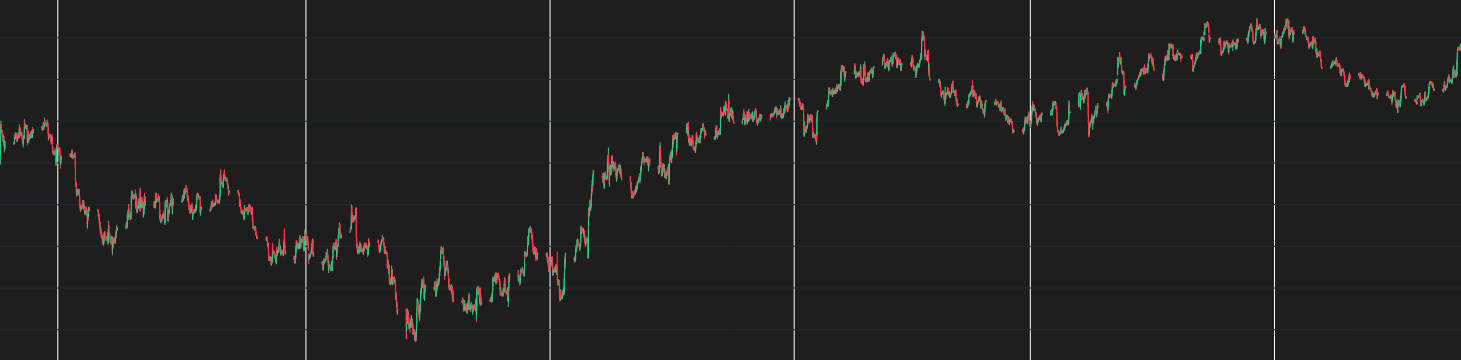

In [106]:
utility.CandleStick(df)

In [107]:
for col in df.columns:
    if col not in ['close', 'datetime']:
        df.drop(col, axis=1, inplace=True)

In [108]:
df.columns

Index(['datetime', 'close'], dtype='object')

In [109]:
df.columns = ['ds', 'y']

In [110]:
df.head()

,ds,y
0,2022-06-16 14:00:00,1.043188
1,2022-06-16 15:00:00,1.045478
2,2022-06-16 16:00:00,1.049759
3,2022-06-16 17:00:00,1.053075
4,2022-06-16 18:00:00,1.056078


In [111]:
part = pd.to_datetime("4/1/23")
train = df[df['ds'] <= part]
test = df[df['ds'] > part]

test.tail()

,ds,y
6205,2023-06-16 10:00:00,1.095290
6206,2023-06-16 11:00:00,1.095290
6207,2023-06-16 12:00:00,1.094811
6208,2023-06-16 13:00:00,1.096371
6209,2023-06-16 14:00:00,1.097213


In [112]:
print(len(train))
print(len(test))
print(len(test)/(len(test)+len(train)))

4910
1300
0.20933977455716588


In [113]:
model = Prophet()

model.fit(train)

14:28:05 - cmdstanpy - INFO - Chain [1] start processing
14:28:07 - cmdstanpy - INFO - Chain [1] done processing


In [114]:
forecast = model.predict(test[['ds']])

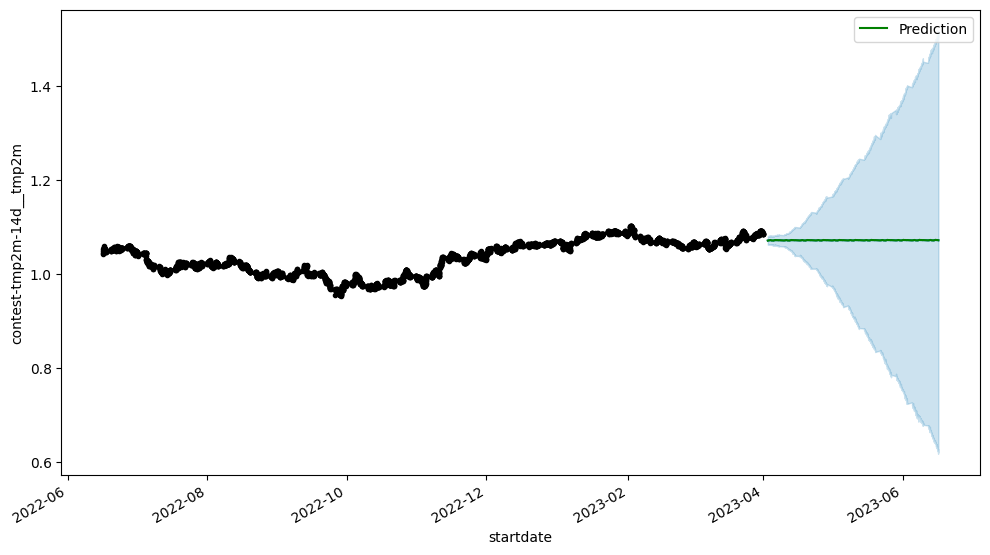

In [115]:
ax = model.plot(forecast).gca()
forecast.plot(ax=ax, x='ds', y='yhat', xlabel="startdate", ylabel="contest-tmp2m-14d__tmp2m", label='Prediction', color='g');

In [116]:
import math
MSE = np.square(np.subtract(forecast['yhat'],test['y'])).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

nan
